In [1]:
# Load libraries
import pandas as pd
import numpy as np
from pandas.tools.plotting import scatter_matrix
import matplotlib.pyplot as plt
#import seaborn as sb



from sklearn import metrics, cross_validation, linear_model, ensemble
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import neural_network
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
%matplotlib inline
#afficher les graphique ici dans le navigateur

import json
from random import randint

C:\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Anaconda2\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [3]:
dataProject_origine = pd.read_csv('train.csv')

In [31]:
dataProject_test = pd.read_csv('test.csv')

In [5]:
dataProject_origine.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [8]:
cols=dataProject_origine.columns.tolist()
sorted(cols)

['ID',
 'TARGET',
 'delta_imp_amort_var18_1y3',
 'delta_imp_amort_var34_1y3',
 'delta_imp_aport_var13_1y3',
 'delta_imp_aport_var17_1y3',
 'delta_imp_aport_var33_1y3',
 'delta_imp_compra_var44_1y3',
 'delta_imp_reemb_var13_1y3',
 'delta_imp_reemb_var17_1y3',
 'delta_imp_reemb_var33_1y3',
 'delta_imp_trasp_var17_in_1y3',
 'delta_imp_trasp_var17_out_1y3',
 'delta_imp_trasp_var33_in_1y3',
 'delta_imp_trasp_var33_out_1y3',
 'delta_imp_venta_var44_1y3',
 'delta_num_aport_var13_1y3',
 'delta_num_aport_var17_1y3',
 'delta_num_aport_var33_1y3',
 'delta_num_compra_var44_1y3',
 'delta_num_reemb_var13_1y3',
 'delta_num_reemb_var17_1y3',
 'delta_num_reemb_var33_1y3',
 'delta_num_trasp_var17_in_1y3',
 'delta_num_trasp_var17_out_1y3',
 'delta_num_trasp_var33_in_1y3',
 'delta_num_trasp_var33_out_1y3',
 'delta_num_venta_var44_1y3',
 'imp_amort_var18_hace3',
 'imp_amort_var18_ult1',
 'imp_amort_var34_hace3',
 'imp_amort_var34_ult1',
 'imp_aport_var13_hace3',
 'imp_aport_var13_ult1',
 'imp_aport_var17_h

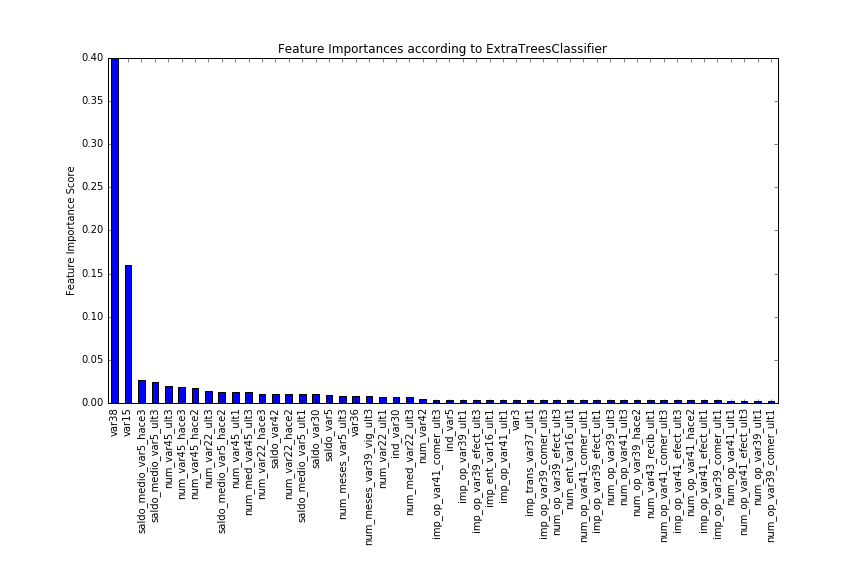

In [27]:
from IPython.display import Image
Image(filename="feature_imporatnce.png")


In [2]:
imporatnce_features=['var38',
                     'var15',
                     'saldo_medio_var5_hace3',
                     'saldo_medio_var5_ult3',
                     'num_var45_ult3',
                     'num_var45_hace3',
                     'num_var45_hace2',
                     'num_var22_ult3',
                     'saldo_medio_var5_hace2',
                     'num_var45_ult1',
                     'num_med_var45_ult3',
                     'num_var22_hace3',
                     'saldo_var42',
                     'num_var22_hace2',
                     'saldo_medio_var5_ult1',
                     'saldo_var30',
                     'saldo_var5',
                     'num_meses_var5_ult3',
                     'var36',
                     'num_meses_var39_vig_ult3',
                     'num_var22_ult1',
                     'ind_var30',
                     'num_med_var22_ult3',
                     'num_var42',
                     'imp_op_var39_ult1',
                     'imp_op_var39_efect_ult3',
                     'imp_ent_var16_ult1',
                     'imp_op_var41_ult1',
                     'var3',
                     'imp_trans_var37_ult1',
                     ]
len(imporatnce_features)

30

In [34]:
Train=dataProject_origine[imporatnce_features+['TARGET']]
Test=dataProject_test[imporatnce_features]

In [35]:
Train.shape , Test.shape

((76020, 31), (75818, 30))

In [36]:
Train.to_csv("train_imp_features.csv")
Test.to_csv("test_imp_features.csv")

<font style="color:red;font-weight:bold;font-size:1.3em;">===============New Start, clear Memory=============</font>

In [3]:
TrainData=pd.read_csv('train_imp_features.csv',index_col=0)
TestData=pd.read_csv('test_imp_features.csv',index_col=0)

In [4]:
TrainData.shape, TestData.shape

((76020, 31), (75818, 30))

In [13]:
TrainData.head()

,var38,var15,saldo_medio_var5_hace3,saldo_medio_var5_ult3,num_var45_ult3,num_var45_hace3,num_var45_hace2,num_var22_ult3,saldo_medio_var5_hace2,num_var45_ult1,...,ind_var30,num_med_var22_ult3,num_var42,imp_op_var39_ult1,imp_op_var39_efect_ult3,imp_ent_var16_ult1,imp_op_var41_ult1,var3,imp_trans_var37_ult1,TARGET
0,39205.170000,23,0.00,0.00,0,0,0,0,0.00,0,...,0,0,0,0.0,0.0,0.0,0.0,2,0.0,0
1,49278.030000,34,88.89,0.00,0,0,0,0,0.00,0,...,1,0,0,0.0,0.0,0.0,0.0,2,0.0,0
2,67333.770000,23,0.18,2.07,0,0,0,0,3.00,0,...,1,0,3,0.0,0.0,0.0,0.0,2,0.0,0
3,64007.970000,37,0.00,138.84,48,3,27,3,186.09,18,...,1,0,3,195.0,0.0,0.0,195.0,2,0.0,0
4,117310.979016,39,0.30,13501.47,0,0,0,9,3.00,0,...,1,3,3,0.0,0.0,0.0,0.0,2,270003.0,0


In [27]:
for col in TestData.columns.values:
    print "%30s"%col,", Nan in Train:",sum(TrainData[col].isnull()),len(TrainData[TrainData[col]==9999999999])," | in Test:",\
    sum(TestData[col].isnull()),len(TestData[TestData[col]==9999999999])

                         var38 , Nan in Train: 0 0  | in Test: 0 0
                         var15 , Nan in Train: 0 0  | in Test: 0 0
        saldo_medio_var5_hace3 , Nan in Train: 0 0  | in Test: 0 0
         saldo_medio_var5_ult3 , Nan in Train: 0 0  | in Test: 0 0
                num_var45_ult3 , Nan in Train: 0 0  | in Test: 0 0
               num_var45_hace3 , Nan in Train: 0 0  | in Test: 0 0
               num_var45_hace2 , Nan in Train: 0 0  | in Test: 0 0
                num_var22_ult3 , Nan in Train: 0 0  | in Test: 0 0
        saldo_medio_var5_hace2 , Nan in Train: 0 0  | in Test: 0 0
                num_var45_ult1 , Nan in Train: 0 0  | in Test: 0 0
            num_med_var45_ult3 , Nan in Train: 0 0  | in Test: 0 0
               num_var22_hace3 , Nan in Train: 0 0  | in Test: 0 0
                   saldo_var42 , Nan in Train: 0 0  | in Test: 0 0
               num_var22_hace2 , Nan in Train: 0 0  | in Test: 0 0
         saldo_medio_var5_ult1 , Nan in Train: 0 0  | in Test:

In [5]:
VALID_SIZE = 0.30 # 30% of train
HOLDOUT_SIZE = 0.33 # 33% of valid => 10% of train And it remains 66% of valid => 20% of train for the Vaidation
seed = 7
Y=TrainData.TARGET
X=TrainData.drop("TARGET",axis=1)
#X_test = dataset[:][dataset.index<len(TEST.index)]
X_train, X_valid, Y_train, Y_valid = cross_validation.train_test_split(X, Y, test_size=VALID_SIZE, random_state=seed)
X_valid,X_hold,Y_valid,Y_hold = cross_validation.train_test_split(X_valid, Y_valid, test_size=HOLDOUT_SIZE, random_state=seed)

In [6]:
print "Train     : ",X_train.shape, Y_train.shape, "     70% of Dataset", ":: TARGET distribution ",Y_train.value_counts().values
print "Validation: ",X_valid.shape, Y_valid.shape, "     20% of Dataset", ":: TARGET distribution ",Y_valid.value_counts().values
print "Holdout   : ",X_hold.shape, Y_hold.shape, "     10% of Dataset", ":: TARGET distribution ",Y_hold.value_counts().values


Train     :  (53214, 30) (53214,)      70% of Dataset :: TARGET distribution  [51106  2108]
Validation:  (15280, 30) (15280,)      20% of Dataset :: TARGET distribution  [14654   626]
Holdout   :  (7526, 30) (7526,)      10% of Dataset :: TARGET distribution  [7252  274]


In [8]:
X_train["TARGET"]=Y_train
X_valid["TARGET"]=Y_valid
X_hold["TARGET"]=Y_hold
X_train.to_csv("datas/train_final.csv")
X_valid.to_csv("datas/valid_final.csv")
X_hold.to_csv("datas/hold_final.csv")

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


<font style="color:red;font-weight:bold;font-size:1.3em;">===============New Start, clear Memory=============</font>

In [17]:
TestData=pd.read_csv('test_imp_features.csv',index_col=0)
X_train=pd.read_csv('datas/train_final.csv',index_col=0)
X_valid=pd.read_csv('datas/valid_final.csv',index_col=0)
X_hold=pd.read_csv('datas/hold_final.csv',index_col=0)
Y_train,Y_valid,Y_hold=X_train.TARGET,X_valid.TARGET,X_hold.TARGET
X_train,X_valid,X_hold=X_train.drop("TARGET",axis=1),X_valid.drop("TARGET",axis=1),X_hold.drop("TARGET",axis=1)

In [18]:
print "Train     : ",X_train.shape, Y_train.shape, "     70% of Dataset", ":: TARGET distribution ",Y_train.value_counts().values
print "Validation: ",X_valid.shape, Y_valid.shape, "     20% of Dataset", ":: TARGET distribution ",Y_valid.value_counts().values
print "Holdout   : ",X_hold.shape, Y_hold.shape, "     10% of Dataset", ":: TARGET distribution ",Y_hold.value_counts().values

Train     :  (53214, 30) (53214,)      70% of Dataset :: TARGET distribution  [51106  2108]
Validation:  (15280, 30) (15280,)      20% of Dataset :: TARGET distribution  [14654   626]
Holdout   :  (7526, 30) (7526,)      10% of Dataset :: TARGET distribution  [7252  274]


<font style="color:blue;font-weight:bold;font-size:1.3em;">Finds the models with its parameters where the score is greater than 0.5 </font>

In [19]:
imporatnce_features=['var38',
                     'var15',
                     'saldo_medio_var5_hace3',
                     'saldo_medio_var5_ult3',
                     'num_var45_ult3',
                     'num_var45_hace3',
                     'num_var45_hace2',
                     'num_var22_ult3',
                     'saldo_medio_var5_hace2',
                     'num_var45_ult1',
                     'num_med_var45_ult3',
                     'num_var22_hace3',
                     'saldo_var42',
                     'num_var22_hace2',
                     'saldo_medio_var5_ult1',
                     'saldo_var30',
                     'saldo_var5',
                     'num_meses_var5_ult3',
                     'var36',
                     'num_meses_var39_vig_ult3',
                     'num_var22_ult1',
                     'ind_var30',
                     'num_med_var22_ult3',
                     'num_var42',
                     'imp_op_var39_ult1',
                     'imp_op_var39_efect_ult3',
                     'imp_ent_var16_ult1',
                     'imp_op_var41_ult1',
                     'var3',
                     'imp_trans_var37_ult1',
                     ]
len(imporatnce_features)

30

In [22]:
RAND_STATE=7
scoring = 'roc_auc'
N_TREES = 500

PARAM_GRID = {
    'LR': {'C': [10**x for x in range(-8,5)],
           'class_weight': ['balanced'],
           'penalty':['l2'],
           'solver' :['newton-cg', 'lbfgs', 'liblinear', 'sag'],
           'random_state':[RAND_STATE,],
    },
    
    'RFC': {
        'n_jobs': [3],
        'criterion':["gini","entropy"],
        "max_features":["sqrt",None],
        "max_depth":[180,200,None],
        "n_estimators":[500,1000],
        "min_samples_split":[2,5,10],
        "class_weight": ['balanced','balanced_subsample',None],
        'random_state':[RAND_STATE,],
    },
    'DTC': {#DecisionTreeClassifier
        "criterion":["gini","entropy"],
        "splitter":["best","random"],
        "max_features":["sqrt",None],
        "max_depth":[None,],
        "min_samples_split":[2,5,9,12,15],
        'class_weight': ['balanced',None],
        "presort":[False],
        'random_state':[RAND_STATE,],
    },
    'ExtraTreesClassifier': {'min_samples_leaf': [2, 3],
                             'n_jobs': [5],
                             'min_samples_split': [1, 2, 5],
                             'bootstrap': [False],
                             'max_depth': [15, 20, 25, 30],
                             'max_features': [1, 3, 5, 8],
                             'random_state':[RAND_STATE,],
    },
    'GBC': {'max_features': [4, 5, 6, 7, 8],
            'learning_rate': [.05, .08, .1],
            'max_depth': [8, 10, 13],
            'random_state':[RAND_STATE,],
    },
    'SVC':{'C':[10**x for x in range(-7,4)],
           'kernel':['linear', 'poly', 'rbf', 'sigmoid', 'precomputed'],
           'gamma':['auto',0.5,0.7],
           'degree':[2,3],
           'class_weight': ['balanced',],
           'probability':[True,],
           'random_state':[RAND_STATE,],
          },
    'KNN':{ 'n_neighbors' : list({randint(1,500) for i in range(4)}),
            'weights' : ['uniform','distance'],
            'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
            'leaf_size' : [20,30,40,60],
            'metric' : ['minkowski',],
            #'n_jobs' :[2,],
            'p' : [1,2,7,10],
          },
    'NNC':{'solver' : ['lbfgs', 'sgd', 'adam'],
           'hidden_layer_sizes':[1,2,4,8,32,128],
           'activation':['identity', 'logistic', 'tanh', 'relu'],
           'alpha':[0.0001,0.005],#L2 penalty (regularization term) parameter.
           'batch_size':['auto'],#auto=min(200,n_samples)
           'learning_rate': ['constant', 'invscaling', 'adaptive'],
           #'momentu':[0,0.2,0.5,0.9], 
           'random_state':[RAND_STATE,],
    },
    'BAGC':{#BaggingClassifier
        'base_estimator':[DecisionTreeClassifier(),linear_model.LogisticRegression(),KNeighborsClassifier(),SVC()],
        'n_estimators':[5,10,20],
        'max_samples':[0.8,1.0],
        'max_features':[0.5,1.0],
        'n_jobs':[1,],
        'random_state':[RAND_STATE,],
        
    }
}

models= {
    'LR': linear_model.LogisticRegression(),
    'KNN': KNeighborsClassifier(),
    #'GBC': ensemble.GradientBoostingClassifier(),
    'RFC': ensemble.RandomForestClassifier(),
    #'ExtraTreesClassifier': ensemble.ExtraTreesClassifier(),
    'SVC':SVC(),
    'NNC': neural_network.MLPClassifier(),
    'DTC': DecisionTreeClassifier(),
    'BAGC': ensemble.BaggingClassifier(),
    
}

In [23]:

def generer20Feature():
    nb=len(imporatnce_features)
    a=set()
    while len(a)<=20:
        a.add(randint(0,nb-1))
    return list(a)

In [24]:
#generation and stock the different combinaisons of features has a length 20 
#X_train[(10,11,1,2,29)]
for i in range(5):
    print generer20Feature()

[1, 2, 5, 8, 10, 11, 12, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 27, 28]
[0, 1, 3, 7, 8, 9, 10, 11, 12, 13, 15, 16, 18, 19, 20, 22, 23, 24, 25, 27, 29]
[0, 1, 5, 6, 7, 10, 11, 12, 13, 15, 17, 18, 19, 20, 21, 22, 24, 25, 26, 28, 29]
[0, 1, 5, 6, 7, 8, 10, 14, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]
[0, 1, 6, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 19, 20, 22, 23, 25, 26, 27, 29]


In [25]:
def generatorParameters(algoName):
    params=PARAM_GRID[algoName]
    prms=dict()
    ch="""def genarator_parameters(nameAlgo):
    params=PARAM_GRID[nameAlgo]
    prms=dict()
    
    """
    i=0
    for key,val in params.items():
        ch+='\t'*i
        ch+="""for """+key+""" in params['"""+key+"""']:
        """+('\t'*(i+1))+"""prms['"""+key+"""']="""+key+"""
            """
        i+=1
    ch+='\t'*i
    ch+="""yield prms
    """
    ch+='\t'*(i+1)
    #ch+="""prms=dict()"""
    exec(ch)
    return genarator_parameters(algoName)
    
for pr in generatorParameters('GBC'):
    print pr
        
 

{'max_features': 4, 'learning_rate': 0.05, 'random_state': 7, 'max_depth': 8}
{'max_features': 4, 'learning_rate': 0.05, 'random_state': 7, 'max_depth': 10}
{'max_features': 4, 'learning_rate': 0.05, 'random_state': 7, 'max_depth': 13}
{'max_features': 4, 'learning_rate': 0.08, 'random_state': 7, 'max_depth': 8}
{'max_features': 4, 'learning_rate': 0.08, 'random_state': 7, 'max_depth': 10}
{'max_features': 4, 'learning_rate': 0.08, 'random_state': 7, 'max_depth': 13}
{'max_features': 4, 'learning_rate': 0.1, 'random_state': 7, 'max_depth': 8}
{'max_features': 4, 'learning_rate': 0.1, 'random_state': 7, 'max_depth': 10}
{'max_features': 4, 'learning_rate': 0.1, 'random_state': 7, 'max_depth': 13}
{'max_features': 5, 'learning_rate': 0.05, 'random_state': 7, 'max_depth': 8}
{'max_features': 5, 'learning_rate': 0.05, 'random_state': 7, 'max_depth': 10}
{'max_features': 5, 'learning_rate': 0.05, 'random_state': 7, 'max_depth': 13}
{'max_features': 5, 'learning_rate': 0.08, 'random_state': 

In [31]:
def execAlgo(ALGO,set_features,parameters,file_json,i,prefix_id="",score_seuil=0.5):
    try:
        ALGO.set_params(**parameters)
        ALGO.fit(X_train[set_features],Y_train)
        ALGO_preds = ALGO.predict_proba(X_valid[set_features])[:, 1]
        fpr,tpr,ll=metrics.roc_curve(Y_valid, ALGO_preds)
        score=metrics.auc(fpr, tpr)
        #print score,":",set_features
        if score>=score_seuil:#si >=score_seuil on stock
            idd=prefix_id+"_"+str(i)
            obj_json=dict()
            obj_json["id"]=idd
            obj_json["score"]=score
            obj_json["params"]=parameters
            obj_json["features"]=set_features
            obj_json["valid"]=ALGO.predict(X_valid[set_features]).tolist()
            obj_json["hold"]=ALGO.predict(X_hold[set_features]).tolist()
            obj_json["test"]=ALGO.predict(TestData[set_features]).tolist()
            json.dump(obj=obj_json,fp=file_json,indent=5)
            file_json.flush()
            i+=1#rise the number of classifier
    except Exception as e:
        print e
    return i,score#return the next position of next classifier, and score

In [34]:
def run_stock_for_algo(model_name):
    with open("results/"+model_name+".amh","w") as dtOut:#results file
        seuil_score=0.6
        #obj_json=dict()
        i,min_score,max_score=1,1,0
        ALGO=models[model_name]
        all_features=list(range(len(imporatnce_features)))
        for parameters in generatorParameters(model_name):
            j=i
            set_features=generer20Feature()
            i,score=execAlgo(ALGO,all_features,parameters,dtOut,i,model_name,seuil_score)
            min_score=score if score<min_score and i>j else min_score
            max_score=score if score>max_score and i>j else max_score
            j=i
            i,score=execAlgo(ALGO,set_features,parameters,dtOut,i,model_name,seuil_score)
            min_score=score if score<min_score and i>j else min_score
            max_score=score if score>max_score and i>j else max_score
        #json.dump(obj=obj_json,fp=dtOut,indent=5)
        dtOut.flush()
        print i-1, "Classifier :"+model_name,"  with the scores between:",min_score,"and ",max_score

In [13]:
#---------------DecisionTreeClassifier--------#DONE
model_name="DTC"
run_stock_for_algo(model_name)

102 Classifier :DTC   with the scores between: 0.600081278444 and  0.68998302048


In [19]:
#---------------LogisticRegression--------#DONE
model_name="LR"
run_stock_for_algo(model_name)

104 Classifier :LR   with the scores between: 0.63680641341 and  0.76521583482


In [ ]:
#---------------KNeighborsClassifier--------# HP-Prof Pc #
model_name="KNN"
run_stock_for_algo(model_name)

In [ ]:
# ---------------RandomForestClassifier--------#
model_name="RFC"
run_stock_for_algo(model_name)

In [12]:
# ---------------neural_network.MLPClassifier--------#
model_name="NNC"
run_stock_for_algo(model_name)

C:\Anaconda2\lib\site-packages\sklearn\neural_network\_stochastic_optimizers.py:174: RuntimeWarning: invalid value encountered in subtract
  for velocity, grad in zip(self.velocities, grads)]
C:\Anaconda2\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
# ---------------BaggingClassifier--------#
model_name="BAGC"
run_stock_for_algo(model_name)

In [ ]:
# ---------------SVC--------#
model_name="SVC"
run_stock_for_algo(model_name)

In [15]:
[10**x for x in range(-8,5)]

[1e-08, 1e-07, 1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]

In [15]:
for col in X_train.columns.values:
    print "%30s"%col,", Nan in Train:",sum(X_train[col].isnull()),len(X_train[X_train[col]==9999999999])," | in Test:",\
    sum(X_test[col].isnull()),len(X_test[X_valid[col]==9999999999])

                         var38 , Nan in Train: 0 0  | in Test:

NameError: name 'X_test' is not defined